# A1_KmeansIris

Valeria Cortez Carreón

A00571474

Last updated: 16/09/2021

# K-means clustering

The notebook aims to study and implement a k-means clustering. The iris dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [73]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [74]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url, names=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Species', 'Species_NumValue'])


# Understanding and preprocessing the data

1. Get a general 'feel' of the data


In [75]:
print(dataset.shape)

dataset.head()


(150, 6)


,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,Species_NumValue
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


2. Drop rows with any missing values

In [76]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 6)


3. Encoding the class label categorical column: from string to num


In [77]:
# Encoding the categorical column
dataset = dataset.replace({"Species":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species,Species_NumValue
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3
146,6.3,2.5,5.0,1.9,2,3
147,6.5,3.0,5.2,2.0,2,3
148,6.2,3.4,5.4,2.3,2,3


4. Discard columns that won't be used


In [78]:
# Drop out non necesary columns
dataset.drop(['Species_NumValue', 'Petal_length', 'Petal_width'],axis='columns',inplace=True)

#Visualize the dataset
dataset


,Sepal_length,Sepal_width,Species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


5. Scatter plot of the data

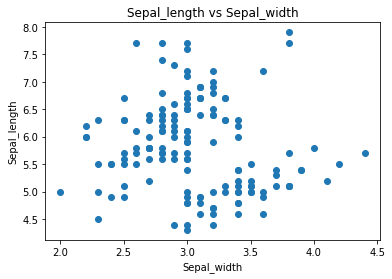

In [79]:
plt.scatter(dataset.Sepal_width,dataset.Sepal_length)
plt.title('Sepal_length vs Sepal_width')
plt.xlabel('Sepal_width')
plt.ylabel('Sepal_length')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<ipython-input-80-978fe6eae829>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_width, df1.Sepal_length, Label='Setosa')
<ipython-input-80-978fe6eae829>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_width, df2.Sepal_length, Label='Versicolor')
<ipython-input-80-978fe6eae829>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_width, df3.Sepal_length, Label='Virginica')


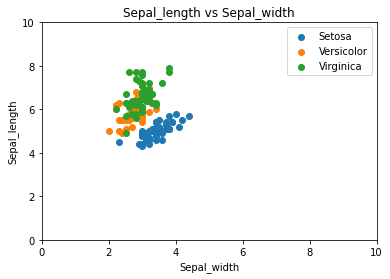

In [80]:
df1 = dataset[dataset.Species==0]
df2 = dataset[dataset.Species==1]
df3 = dataset[dataset.Species==2]

plt.scatter(df1.Sepal_width, df1.Sepal_length, Label='Setosa')
plt.scatter(df2.Sepal_width, df2.Sepal_length, Label='Versicolor')
plt.scatter(df3.Sepal_width, df3.Sepal_length, Label='Virginica')

plt.title('Sepal_length vs Sepal_width')
plt.xlabel('Sepal_width')
plt.ylabel('Sepal_length')
plt.xlim([0,10])
plt.ylim([0,10])
plt.legend()
plt.show()



So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [81]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Sepal_width','Sepal_length']])

# Print estimated cluster of each point in the dataser
yp

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [82]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = yp

dataset

,Sepal_length,Sepal_width,Species,Cluster1
0,5.1,3.5,0,2
1,4.9,3.0,0,2
2,4.7,3.2,0,2
3,4.6,3.1,0,2
4,5.0,3.6,0,2
...,...,...,...,...
145,6.7,3.0,2,0
146,6.3,2.5,2,1
147,6.5,3.0,2,0
148,6.2,3.4,2,0


In [83]:
dataset.Cluster1.unique()

array([2, 0, 1])

In [84]:
# ...
km.cluster_centers_

array([[3.07446809, 6.81276596],
       [2.69245283, 5.77358491],
       [3.428     , 5.006     ]])

In [85]:
# ...
km.inertia_

37.0507021276596

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-86-2b81b54c2d11>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_width, df1.Sepal_length, Label='Setosa')
<ipython-input-86-2b81b54c2d11>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_width, df2.Sepal_length, Label='Versicolor')
<ipython-input-86-2b81b54c2d11>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_width, df3.Sepal_length, Label='Virginica')


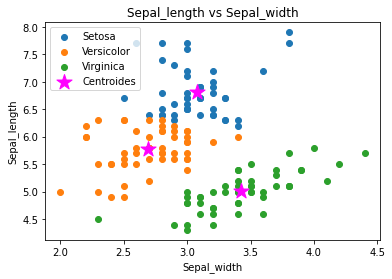

In [86]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]


plt.scatter(df1.Sepal_width, df1.Sepal_length, Label='Setosa')
plt.scatter(df2.Sepal_width, df2.Sepal_length, Label='Versicolor')
plt.scatter(df3.Sepal_width, df3.Sepal_length, Label='Virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal_length vs Sepal_width')
plt.xlabel('Sepal_width')
plt.ylabel('Sepal_length')
plt.legend()
plt.show()


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [87]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['Sepal_width','Sepal_length']])
    sse.append(km.inertia_)

C:\Users\valer\ANACONA\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


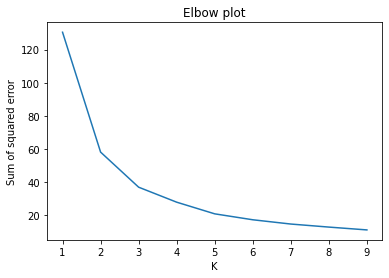

In [88]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['Sepal_width']])
dataset['Sepal_width'] = scaler.transform(dataset[['Sepal_width']])

scaler.fit(dataset[['Sepal_length']])
dataset['Sepal_length'] = scaler.transform(dataset[['Sepal_length']])

dataset

,Sepal_length,Sepal_width,Species,Cluster1
0,0.222222,0.625000,0,2
1,0.166667,0.416667,0,2
2,0.111111,0.500000,0,2
3,0.083333,0.458333,0,2
4,0.194444,0.666667,0,2
...,...,...,...,...
145,0.666667,0.416667,2,0
146,0.555556,0.208333,2,1
147,0.611111,0.416667,2,0
148,0.527778,0.583333,2,0


In [90]:
dataset.describe()

,Sepal_length,Sepal_width,Species,Cluster1
count,150.000000,150.000000,150.000000,150.0000
mean,0.428704,0.440556,1.000000,1.0200
std,0.230018,0.181611,0.819232,0.8066
min,0.000000,0.000000,0.000000,0.0000
25%,0.222222,0.333333,0.000000,0.0000
50%,0.416667,0.416667,1.000000,1.0000
75%,0.583333,0.541667,2.000000,2.0000
max,1.000000,1.000000,2.000000,2.0000


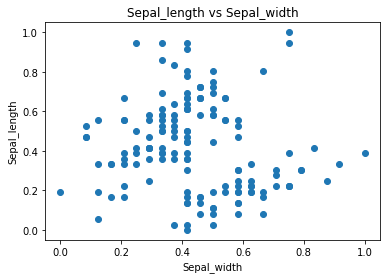

In [91]:
plt.scatter(dataset.Sepal_width,dataset.Sepal_length)
plt.title('Sepal_length vs Sepal_width')
plt.xlabel('Sepal_width')
plt.ylabel('Sepal_length')
plt.show()

In [92]:
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Sepal_width','Sepal_length']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [93]:
# Add a new column to the dataset with the cluster information
dataset['Cluster2'] = yp

dataset

,Sepal_length,Sepal_width,Species,Cluster1,Cluster2
0,0.222222,0.625000,0,2,0
1,0.166667,0.416667,0,2,0
2,0.111111,0.500000,0,2,0
3,0.083333,0.458333,0,2,0
4,0.194444,0.666667,0,2,0
...,...,...,...,...,...
145,0.666667,0.416667,2,0,2
146,0.555556,0.208333,2,1,1
147,0.611111,0.416667,2,0,2
148,0.527778,0.583333,2,0,2


<ipython-input-94-d0a435636d5a>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_width, df1.Sepal_length, Label='Setosa')
<ipython-input-94-d0a435636d5a>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_width, df2.Sepal_length, Label='Versicolor')
<ipython-input-94-d0a435636d5a>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_width, df3.Sepal_length, Label='Virginica')


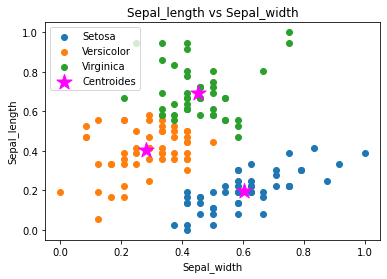

In [94]:
df1 = dataset[dataset.Cluster2==0]
df2 = dataset[dataset.Cluster2==1]
df3 = dataset[dataset.Cluster2==2]


plt.scatter(df1.Sepal_width, df1.Sepal_length, Label='Setosa')
plt.scatter(df2.Sepal_width, df2.Sepal_length, Label='Versicolor')
plt.scatter(df3.Sepal_width, df3.Sepal_length, Label='Virginica')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal_length vs Sepal_width')
plt.xlabel('Sepal_width')
plt.ylabel('Sepal_length')
plt.legend()
plt.show()

# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means